170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


c:\Users\anujt_3nxzaxy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3921 - loss: 1.6647 - val_accuracy: 0.6046 - val_loss: 1.1300
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6232 - loss: 1.0695 - val_accuracy: 0.6394 - val_loss: 1.0478
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6815 - loss: 0.9129 - val_accuracy: 0.6762 - val_loss: 0.9552
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7231 - loss: 0.7928 - val_accuracy: 0.6713 - val_loss: 0.9676
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7518 - loss: 0.7089 - val_accuracy: 0.7080 - val_loss: 0.8678
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7768 - loss: 0.6406 - val_accuracy: 0.6710 - val_loss: 0.9784
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8029 - loss: 0.5639 - val_accuracy: 0.7001 - val_loss: 0.9364
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8262 - loss: 0

c:\Users\anujt_3nxzaxy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3069 - loss: 1.8753 - val_accuracy: 0.4840 - val_loss: 1.4385
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4578 - loss: 1.5136 - val_accuracy: 0.5552 - val_loss: 1.2512
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4971 - loss: 1.3918 - val_accuracy: 0.5685 - val_loss: 1.1900
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5288 - loss: 1.3207 - val_accuracy: 0.6140 - val_loss: 1.0782
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5451 - loss: 1.2727 - val_accuracy: 0.6025 - val_loss: 1.1164
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5571 - loss: 1.2308 - val_accuracy: 0.6219 - val_loss: 1.0787
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5732 - loss: 1.2045 - val_accuracy: 0.6379 - val_loss: 1.0317
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5747 - loss: 1.19

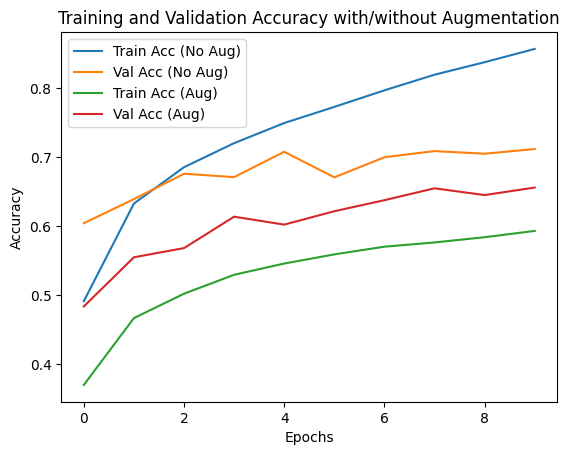

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

# Define CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model Without Augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Train Model With Augmentation
model_aug = create_model()
history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=10)

# Plot Training and Validation Accuracy
plt.plot(history_no_aug.history['accuracy'], label='Train Acc (No Aug)')
plt.plot(history_no_aug.history['val_accuracy'], label='Val Acc (No Aug)')
plt.plot(history_aug.history['accuracy'], label='Train Acc (Aug)')
plt.plot(history_aug.history['val_accuracy'], label='Val Acc (Aug)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with/without Augmentation')
plt.show()
